In [68]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [69]:
import pandas as pd

In [70]:
import numpy as np

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.model_selection import train_test_split

In [73]:
dataset_url =r"C:\Users\uw\Downloads\MAIN ONLINE NEWS POPULARITY.csv"
df = pd.read_csv(dataset_url)

In [74]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1    kw_avg_min                    39644 non-null  float64
 2    kw_avg_max                    39644 non-null  float64
 3    kw_max_avg                    39644 non-null  float64
 4    self_reference_min_shares     39644 non-null  float64
 5    self_reference_max_shares     39644 non-null  float64
 6    self_reference_avg_sharess    39644 non-null  float64
 7    LDA_02                        39644 non-null  float64
 8    LDA_03                        39644 non-null  float64
 9    global_subjectivity           39644 non-null  float64
 10   avg_negative_polarity         39644 non-null  float64
 11   max_negative_polarity         39644 non-null  float64
 12   title_subjectivity         

In [75]:
df = df.dropna()

In [76]:
def univariate_analysis(data):
    for col in data.select_dtypes(include=['int64', 'float64']).columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Univariate Analysis: {col}')

In [77]:
plt.show()

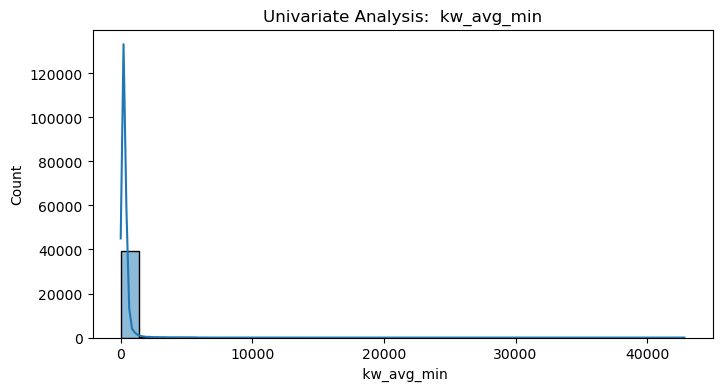

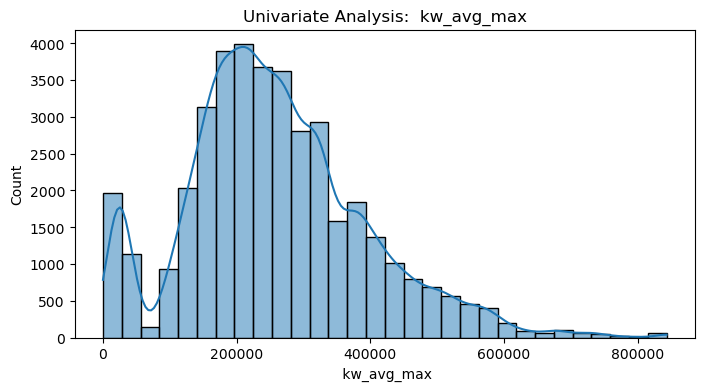

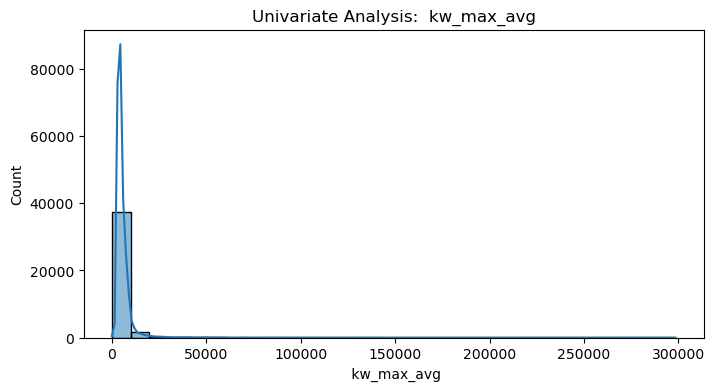

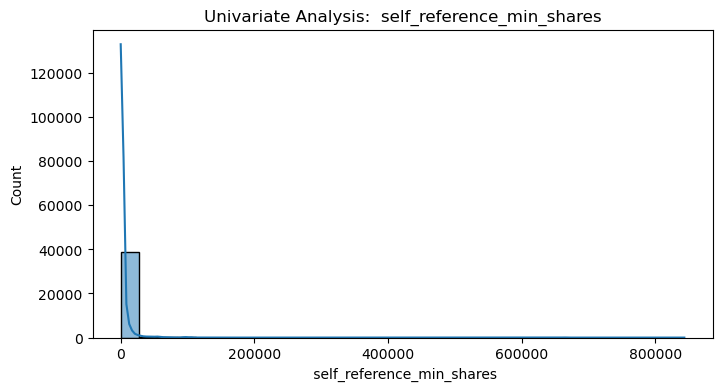

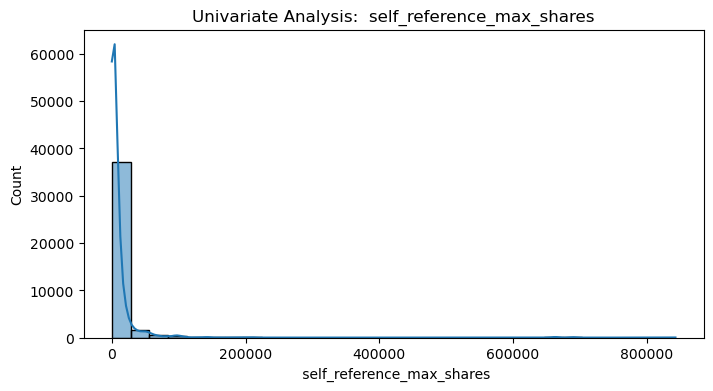

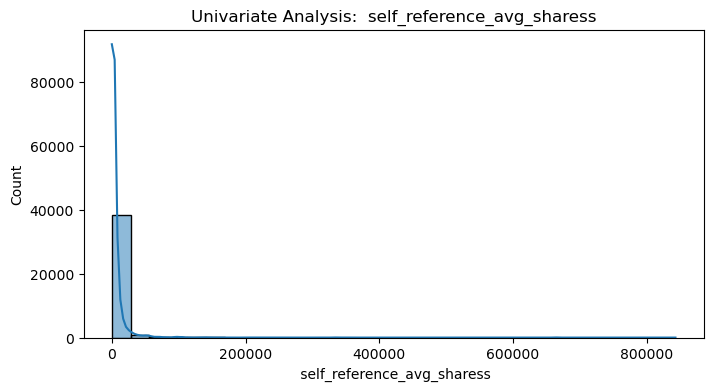

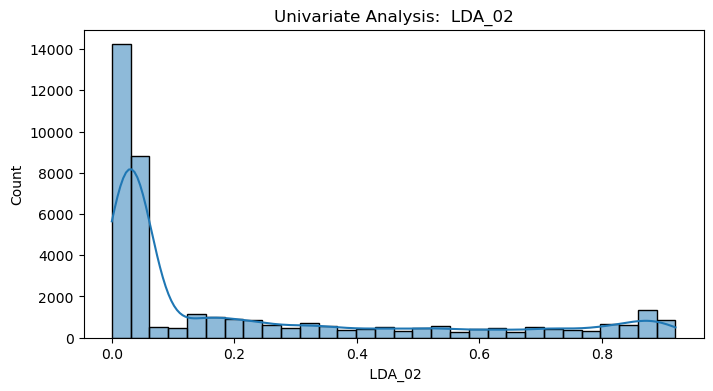

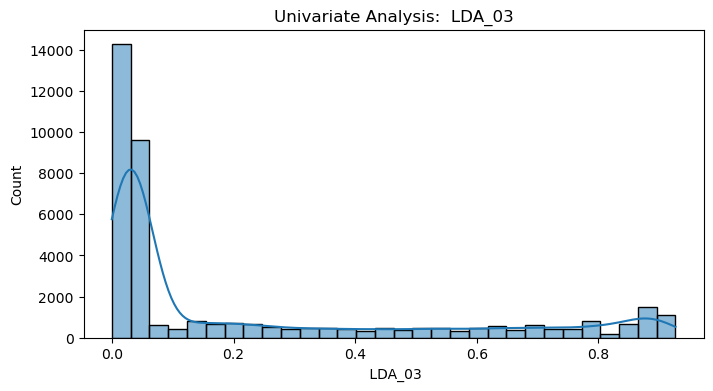

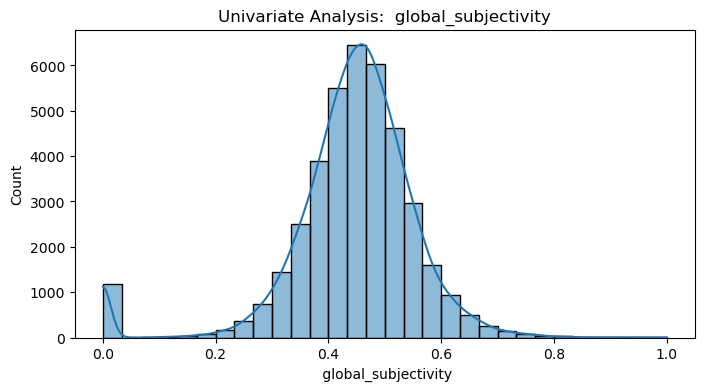

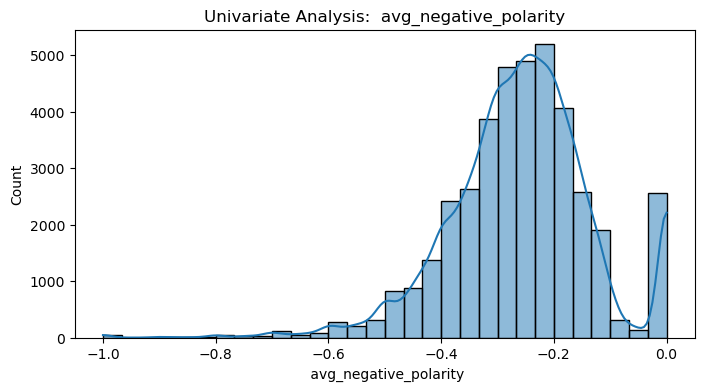

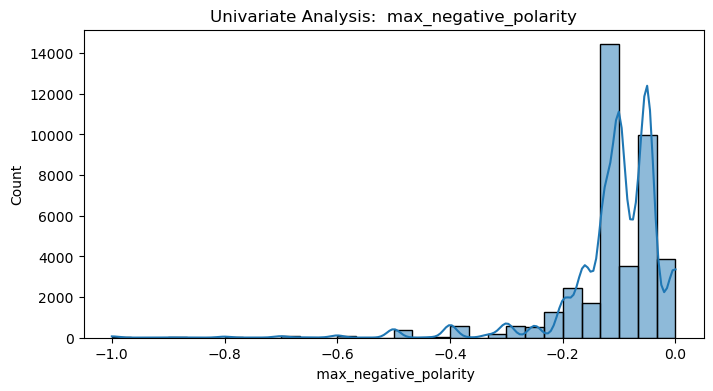

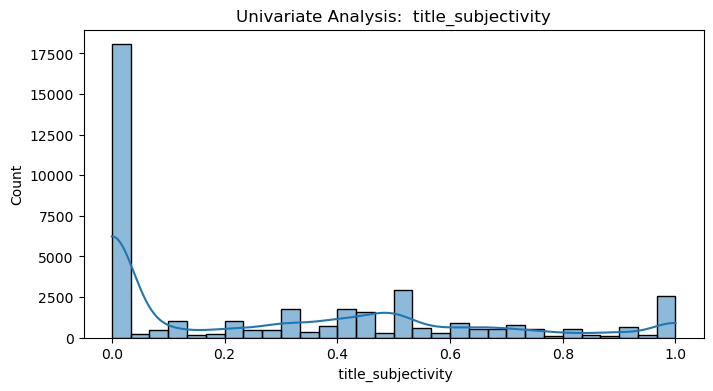

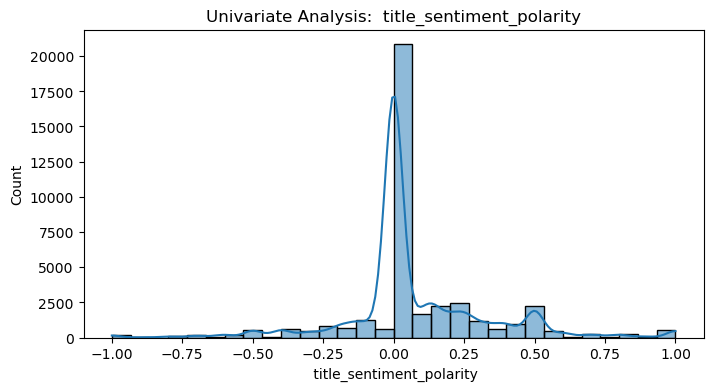

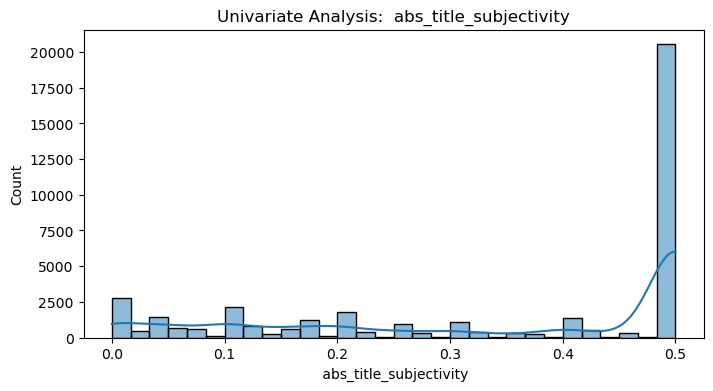

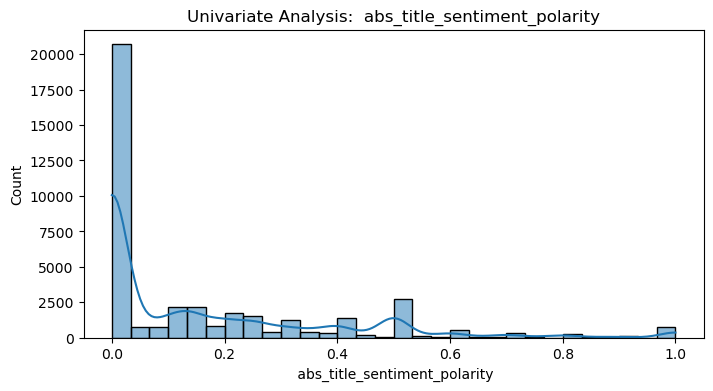

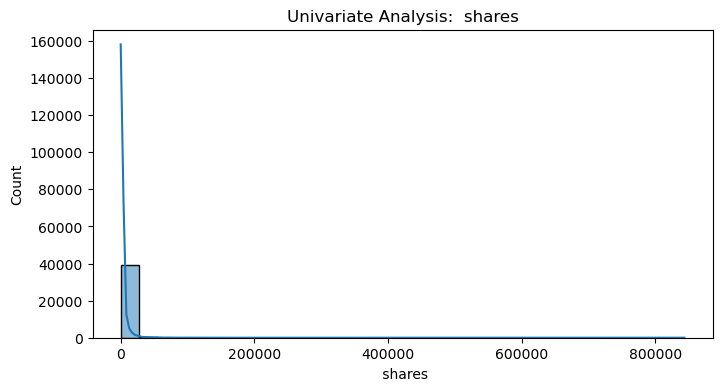

In [84]:
univariate_analysis(df)

In [89]:
def bivariate_analysis(data):
    sns.pairplot(data, diag_kind='kde')

In [90]:
plt.show()

In [91]:
df = pd.read_csv(r"C:\Users\uw\Downloads\MAIN ONLINE NEWS POPULARITY.csv")

In [96]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
skewed_features = df[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [98]:
print("Skewness of numeric features:\n", skewed_features)

Skewness of numeric features:
 shares                          33.962600
kw_avg_min                      31.304924
self_reference_min_shares       26.263370
self_reference_avg_sharess      17.913416
kw_max_avg                      16.411049
self_reference_max_shares       13.870324
abs_title_sentiment_polarity     1.704129
LDA_02                           1.311645
LDA_03                           1.238669
title_subjectivity               0.816054
kw_avg_max                       0.624286
title_sentiment_polarity         0.396094
avg_negative_polarity           -0.551623
abs_title_subjectivity          -0.624126
global_subjectivity             -1.372637
max_negative_polarity           -3.459616
dtype: float64


In [100]:
transformer = PowerTransformer(method='yeo-johnson')
df[numeric_cols] = transformer.fit_transform(df[numeric_cols])

In [101]:
from sklearn.model_selection import train_test_split

In [104]:
from sklearn.feature_selection import RFE

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
df.columns = df.columns.str.replace(r'\xa0', '', regex=True)  
df.columns = df.columns.str.strip() 

In [110]:
print(df.columns)

Index(['url', 'kw_avg_min', 'kw_avg_max', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_02', 'LDA_03', 'global_subjectivity',
       'avg_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares'],
      dtype='object')


In [128]:
X = df.drop(columns=['shares'])
y = df['shares']

In [114]:
df.columns = df.columns.str.strip()

In [116]:
if "shares" in df.columns:
    df["shares"] = pd.to_numeric(df["shares"], errors="coerce")
    df.dropna(subset=["shares"],inplace=True)

In [118]:
numeric_df = df.select_dtypes(include=["number"])

correlation_matrix = numeric_df.corr()
target_corr = correlation_matrix["shares"].abs()

In [120]:
threshold = 0.1
selected_features = target_corr[target_corr > threshold].index.tolist()
df_filtered = df[selected_features]

In [124]:
print(type(X))  
print(X.head())

<class 'pandas.core.frame.DataFrame'>
                                                 url  kw_avg_min  kw_avg_max  \
0  http://mashable.com/2013/01/07/amazon-instant-...   -2.879331    -2.64991   
1  http://mashable.com/2013/01/07/ap-samsung-spon...   -2.879331    -2.64991   
2  http://mashable.com/2013/01/07/apple-40-billio...   -2.879331    -2.64991   
3  http://mashable.com/2013/01/07/astronaut-notre...   -2.879331    -2.64991   
4   http://mashable.com/2013/01/07/att-u-verse-apps/   -2.879331    -2.64991   

   kw_max_avg  self_reference_min_shares  self_reference_max_shares  \
0   -8.734902                  -0.292303                  -0.563888   
1   -8.734902                  -1.723839                  -1.714075   
2   -8.734902                  -0.035299                  -0.359504   
3   -8.734902                  -1.723839                  -1.714075   
4   -8.734902                  -0.254921                   0.971402   

   self_reference_avg_sharess    LDA_02    LDA_03  glo

In [130]:
X = X.select_dtypes(include=[np.number])

In [132]:
correlation_matrix = X.corr()

In [134]:
threshold = 0.85

In [136]:
corr_features = set()
for col in correlation_matrix.columns:
    high_corr = correlation_matrix[col][correlation_matrix[col] > threshold].index.tolist()
    high_corr.remove(col) if col in high_corr else None
    corr_features.update(high_corr)

In [138]:
print("Highly Correlated Features to Remove:", corr_features)

Highly Correlated Features to Remove: {'self_reference_min_shares', 'self_reference_avg_sharess', 'self_reference_max_shares'}


In [140]:
X_filtered = X.drop(columns=corr_features)

In [142]:
print("Remaining Features:", X_filtered.columns)

Remaining Features: Index(['kw_avg_min', 'kw_avg_max', 'kw_max_avg', 'LDA_02', 'LDA_03',
       'global_subjectivity', 'avg_negative_polarity', 'max_negative_polarity',
       'title_subjectivity', 'title_sentiment_polarity',
       'abs_title_subjectivity', 'abs_title_sentiment_polarity'],
      dtype='object')


In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)
print("Train Shape:",X_train.shape)
print("Test Shape:",X_test.shape)

Train Shape: (31715, 12)
Test Shape: (7929, 12)
